## EA Sports FC 24 complete player dataset:

* Hipótesis respecto a un valor:La edad promedio de los jugadores en el conjunto de datos es diferente de 25 años.

* Hipótesis respecto dos muestras independientes: El salario promedio de los jugadores en el PSG es diferente del 
#salario promedio de los jugadores en el City.

* Hipótesis varias categorías: Existe una relación entre las posiciones preferidas de los jugadores y sus salarios.

* Hipótesis dos muestras relacionadas: La valoración general de los jugadores en la versión 24.0 de FIFA es diferente de la valoración general en la versión 23.0

In [1]:
#COLUMNAS Y QUE SÓN:
#player_id: Identificación única del jugador.
#player_url: URL asociada al jugador.
#fifa_version: Versión de FIFA a la que pertenece el conjunto de datos.
#fifa_update: Actualización específica de FIFA.
#update_as_of: Fecha de la última actualización del conjunto de datos.
#short_name: Nombre corto del jugador.
#long_name: Nombre completo del jugador.
#player_positions: Posiciones en las que puede jugar el jugador.
#overall: Calificación general del jugador.
#potential: Calificación potencial del jugador.
#value_eur: Valor del jugador en euros.
#wage_eur: Salario del jugador en euros.
#age: Edad del jugador.
#dob: Fecha de nacimiento del jugador.
#height_cm: Altura del jugador en centímetros.
#weight_kg: Peso del jugador en kilogramos.
#club_team_id: Identificación del equipo al que pertenece el jugador.
#club_name: Nombre del club al que pertenece el jugador.
#league_id: Identificación de la liga en la que juega el club.
#league_name: Nombre de la liga en la que juega el club.
#league_level: Nivel de la liga.
#club_position: Posición del jugador en el club.
#club_jersey_number: Número de camiseta del jugador en el club.
#club_loaned_from: Club desde el cual está cedido el jugador.
#club_joined_date: Fecha en la que el jugador se unió al club.
#club_contract_valid_until_year: Año hasta el cual es válido el contrato del jugador con el club.
#nationality_id: Identificación de la nacionalidad del jugador.
#nationality_name: Nombre de la nacionalidad del jugador.
#nation_team_id: Identificación del equipo nacional al que pertenece el jugador.
#nation_position: Posición del jugador en el equipo nacional.
#nation_jersey_number: Número de camiseta del jugador en el equipo nacional.
#preferred_foot: Pie preferido para jugar.
#weak_foot: Calificación de la pierna menos hábil del jugador.
#skill_moves: Número de movimientos hábiles del jugador.
#international_reputation: Reputación internacional del jugador.
#work_rate: Tasa de trabajo del jugador.
#body_type: Tipo de cuerpo del jugador.
#real_face: Indicador de si el jugador tiene una cara real en el juego.
#release_clause_eur: Cláusula de liberación del jugador en euros.
#player_tags: Etiquetas asociadas al jugador.
#player_traits: Rasgos específicos del jugador.

In [2]:
#Leemos el dataset
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

players = pd.read_csv('male_players.csv')
print(players.head())

   player_id                             player_url  fifa_version  \
0     231747    /player/231747/kylian-mbappe/240002          24.0   
1     239085   /player/239085/erling-haaland/240002          24.0   
2     192985  /player/192985/kevin-de-bruyne/240002          24.0   
3     158023     /player/158023/lionel-messi/240002          24.0   
4     165153    /player/165153/karim-benzema/240002          24.0   

   fifa_update update_as_of    short_name                       long_name  \
0          2.0   2023-09-22     K. Mbappé            Kylian Mbappé Lottin   
1          2.0   2023-09-22    E. Haaland            Erling Braut Haaland   
2          2.0   2023-09-22  K. De Bruyne                 Kevin De Bruyne   
3          2.0   2023-09-22      L. Messi  Lionel Andrés Messi Cuccittini   
4          2.0   2023-09-22    K. Benzema                   Karim Benzema   

  player_positions  overall  potential  ...   ldm   cdm   rdm   rwb    lb  \
0           ST, LW       91         94  ...  

C:\Users\Victor\AppData\Local\Temp\ipykernel_9328\1791887862.py:7: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('male_players.csv')


### La edad promedio de los jugadores en el conjunto de datos es diferente de 25 años.

                T     dof alternative         p-val           CI95%   cohen-d  \
T-test  12.575221  180020   two-sided  2.993268e-36  [25.12, 25.16]  0.029638   

             BF10  power  
T-test  5.598e+31    1.0  


<Axes: ylabel='age'>

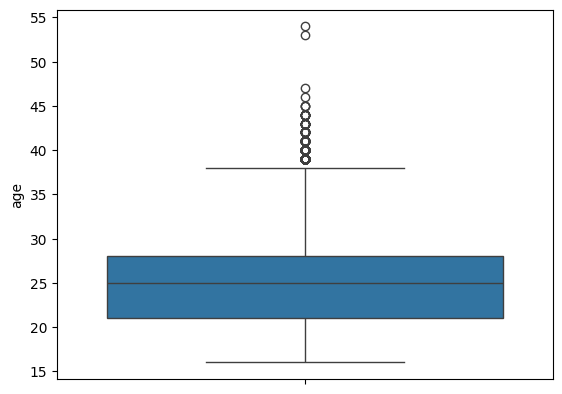

In [3]:
#Hipotesi 0 : Edad = 25
#Hipotesi 1 : mearWeight != 25

edad = 25
result = pg.ttest(players['age'], edad)
print(result)

sns.boxplot(y='age',data=players)

# Hay evidencia significativa para rechazar la hipótesis nula, lo que implica que la edad promedio de los jugadores 
# en el conjunto de datos es estadísticamente diferente de 25 años.

### El salario promedio de los jugadores en el Equipo1 es diferente del salario promedio de los jugadores del Equipo2. En este caso (PSG y City).

               T         dof alternative     p-val                   CI95%  \
T-test -4.669542  571.666002   two-sided  0.000004  [-40842.86, -16657.02]   

         cohen-d      BF10     power  
T-test  0.373206  3238.763  0.995977  


<Axes: xlabel='club_name', ylabel='wage_eur'>

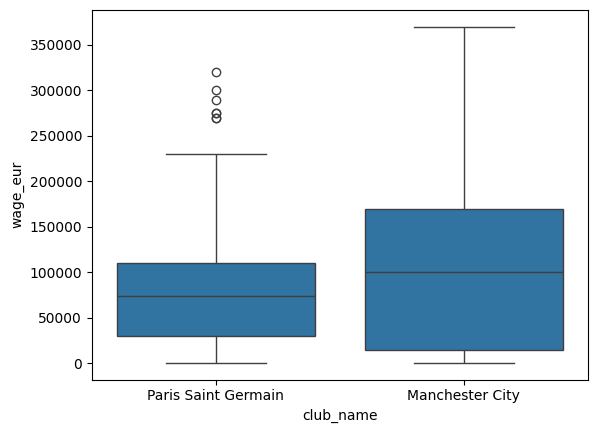

In [4]:
#Hipotesi 0 : Salario PSG = Salario City
#Hipotesi 1 : Salario PSG != Salario City

Equipo1= 'Paris Saint Germain'
Equipo2= 'Manchester City'
data_club_A = players[players['club_name'] == Equipo1]['wage_eur']
data_club_B = players[players['club_name'] == Equipo2]['wage_eur']

test_result = pg.ttest(data_club_A, data_club_B)
print(test_result)

sns.boxplot(x='club_name', y='wage_eur', data=players[players['club_name'].isin(['Paris Saint Germain', 'Manchester City'])])

# Hay una diferencia significativa en los salarios promedio entre los jugadores del PSG y del Manchester City.

### Existe una relación entre las posiciones preferidas (club_position) de los jugadores y sus salarios (wage_eur).

          Source  ddof1  ddof2         F         p-unc       np2
0  club_position     26    958  3.216452  1.381457e-07  0.080286


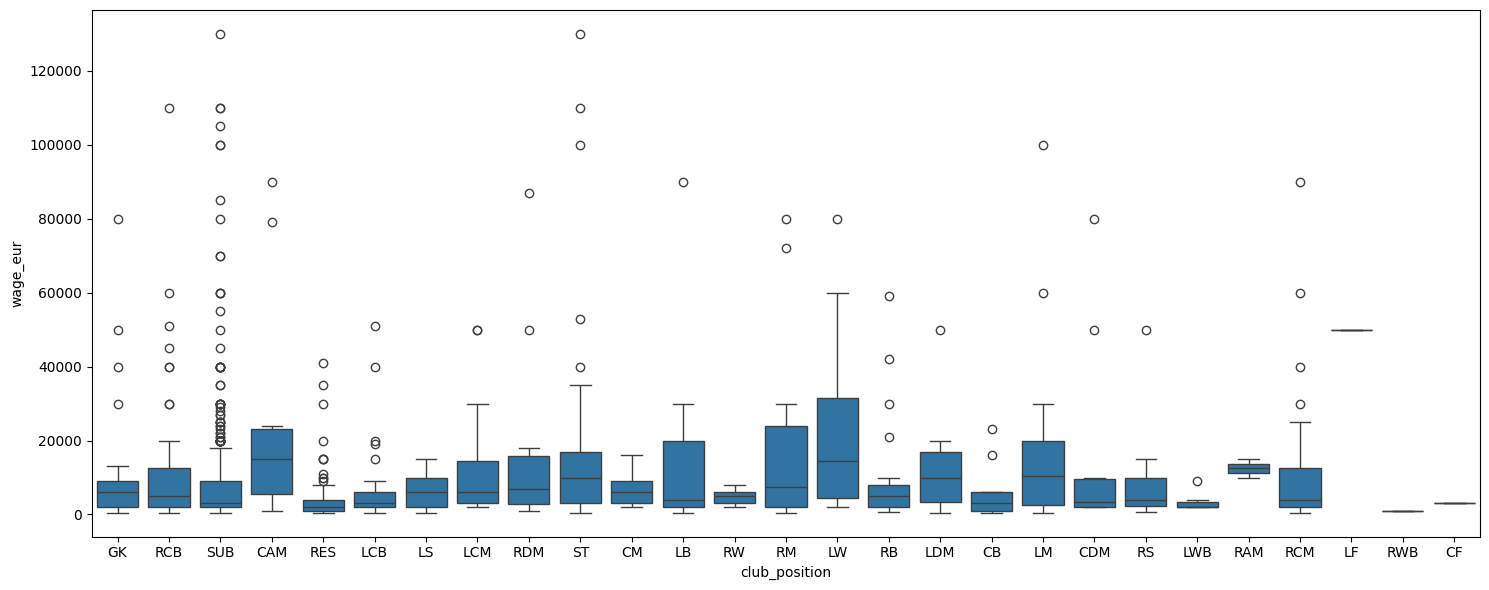

In [5]:
#Hipotesi 0 : Posicion = Salario 
#Hipotesi 1 : Posicion != Salario

tamanosalarios = 1000  
sample_data = players.sample(n=tamanosalarios, random_state=42)
anova_result = pg.anova(data=sample_data, dv='wage_eur', between='club_position')
print(anova_result)

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(y='wage_eur', x='club_position', data=sample_data , ax=ax)
plt.tight_layout()

# Se rechaza la hipótesis nula de que no hay diferencias significativas entre las medias de salarios 
# en al menos dos de las posiciones en el club

### La valoración general (overall) de los jugadores en la versión 24.0 de FIFA es diferente de la valoración general en la versión 23.0

               T           dof alternative     p-val         CI95%   cohen-d  \
T-test  0.020922  36876.834987     greater  0.491654  [-0.12, inf]  0.000218   

         BF10     power  
T-test  0.024  0.052195  


<Axes: xlabel='fifa_version', ylabel='overall'>

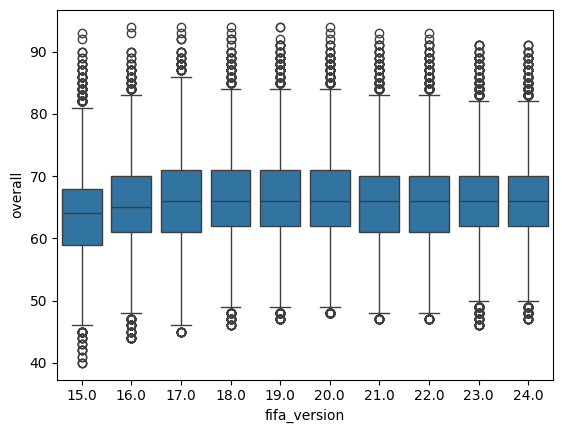

In [6]:
#Hipotesi 0 : Valoración jugadores version 23.0 = Valoración jugadores version 24.0
#Hipotesi 1 : Valoración jugadores version 23.0 != Valoración jugadores version 24.0

version1=24.0
version2=23.0
data_version_24 = players[players['fifa_version']==version1]['overall']
data_version_23 = players[players['fifa_version']==version2]['overall']

test_result = pg.ttest(data_version_24,data_version_23, alternative='greater')
print(test_result)

sns.boxplot(y='overall',x='fifa_version',data=players)

#La hipótesis nula podría ser que no hay diferencia significativa en la valoración 
#general de los jugadores entre las versiones 24.0 y 23.0 de FIFA. 